# Import Architecture

In [1]:
%load_ext autoreload
%autoreload 2
import json 
import math
import numpy as np
import matplotlib as mpl
import networkx as nx
import matplotlib.pyplot as plt
# Import necessary libraries
mpl.rcParams.update(mpl.rcParamsDefault)
#import itertools
from utils.bag_of_words.skill_dataset import *
from utils.bag_of_words.network_property import *
from utils.bag_of_words.dataset_modules import *
from utils.bag_of_words.bipartite_multipartite_projection import *
def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
def l_0_norm(vector):
    count = 0
    total = 0
    for element in vector:
        for sub_element in element:
            if sub_element != 0:
                count += 1
    return count
def take_average(dict):
    data = dict["0"]
    iterations_block = list(["0","1","2","3","4"])
    iterations_channel = list(["0","1","2","3","4"])
    #for style , iterations in zip (["block","channel","block_random","channel_random"],[iterations_block,iterations_channel,iterations_block,iterations_channel]):
    for style , iterations in zip (["block","channel"],[iterations_block,iterations_channel,iterations_block,iterations_channel]):
        for iter in iterations:
            if iter == "0":
                continue
            for ratio in dict[iter][style]:
                for dataset in dict[iter][style][ratio]:
                    for norm in dict[iter][style][ratio][dataset]:
                        value = np.array(dict[iter][style][ratio][dataset][norm])
                        if len( value.shape) != 1:
                            shape_model = value.shape
                        data[style][ratio][dataset][norm]= (np.array(data[style][ratio][dataset][norm])+value)
                        if iter == iterations[-1]:
                            data[style][ratio][dataset][norm] = data[style][ratio][dataset][norm]/len(iterations)
    return data, shape_model

def strip(name):
    name = name.split("/")[-1]
    name = name.split("_")[0]
    return name 

with open("result/distribution_llama_7b.json", 'r') as openfile:
    # Reading from json file
    llama_distribution = json.load(openfile)
with open("result/distribution_vicuna_7b.json", 'r') as openfile:
    # Reading from json file
    vicuna_distribution = json.load(openfile)
with open("result/distribution_llama_7b-chat.json", 'r') as openfile:
    # Reading from json file
    llama_chat_distribution= json.load(openfile)
def loop_over(dict):
    if isinstance(dict, list):
        print("end")
    else: 
        print(dict.keys())
        for keys in dict:
            loop_over(dict[keys])
def get_dataset_list(dataset_list):
    dataname = []
    for data in dataset_list:
        if "subset" not in dataset_list[data].keys():
            dataname.append(data)
        else:
            for subset in dataset_list[data]["subset"]:
                dataname.append(subset)
    return dataname
    #Dataset List
with open("/home/bhandk/MLNeuron/dataset_info.json", 'r') as openfile:
        # Reading from json file
        dataset_list = json.load(openfile)
#Original Distribution
with open("result/original_distribution_vicuna_7b.json", 'r') as openfile:
    vicuna_original = json.load(openfile)
with open("result/original_distribution_llama_7b.json", 'r') as openfile:
    # Reading from json file
    llama_original = json.load(openfile)
with open("result/original_distribution_llama_7b-chat.json", 'r') as openfile:
    # Reading from json file
    llama_chat_original = json.load(openfile)
#Pruned Distribution
with open("result/distribution_llama_7b.json", 'r') as openfile:
    # Reading from json file
    llama_distribution = json.load(openfile)
with open("result/distribution_vicuna_7b.json", 'r') as openfile:
    # Reading from json file
    vicuna_distribution = json.load(openfile)
with open("result/distribution_llama_7b-chat.json", 'r') as openfile:
    # Reading from json file
    llama_chat_distribution= json.load(openfile)
with open("result/dataNeuropsychologicalDomainsCluster.json", 'r') as openfile:
    # Reading from json file
    dataset_community= json.load(openfile)

dataset_list = get_dataset_list(dataset_list)
llama_distribution, model_shape = take_average(llama_distribution)
vicuna_distribution, model_shape = take_average(vicuna_distribution)
llama_chat_distribution, model_shape = take_average(llama_chat_distribution)



In [2]:
from utils.bag_of_words.skill_dataset import *
with open("result/dataNeuropsychologicalDomainsCluster.json", 'r') as openfile:
    # Reading from json file
    dataset_community= json.load(openfile)
with open("result/dataMultidisciplinaryCognitiveSkillsFrameworkRestrict.json", 'r') as openfile:
    #with open("result/dataCategory.json", 'r') as openfile:
    # Reading from json file
    dataCategory = json.load(openfile)
cognitive_skills_community = {
                    "cognitive_process_memory":[ 
                        "sustained_attention", "selective_attention", "divided_attention", "vigilance_attention","attention_shifting",
                        "processing_speed", "visual_processing_speed", "auditory_processing_speed",
                        "prospective_memory", "working_memory", "episodic_memory", "semantic_memory", "procedural_memory", "iconic_memory", "echoic_memory", "spatial_memory"],
                    "executive_function":[ 
                        "planning", "organization", "goal_setting","time_management", 
                        "problem_solving", "mental_flexibility", "strategic_thinking","adaptability",
                        "impulse_control", "decision_making","emotional_regulation","risk_assessment",
                        "abstract_thinking", "reasoning", "cognitive_flexibility", "creativity"], #concept_formation
                    "language_communication":[
                         "expressive_language", "receptive_language", "naming", "fluency", "comprehension", "repetition", "reading", "writing", 
                         "pragmatics", "discourse_ability", "linguistic_analysis", "narrative_skills"],
                    "social_cognition":
                        ["recognition_of_social_cues", "theory_of_mind", "empathy", "social_judgment","intercultural_competence","conflict_resolution","self_awareness","relationship_management"]
}
dataCategory1 = dataCategory#filterData(dataCategory, 1.0)#0.4
all_skill_label = []
for func, skill_list in cognitive_skills_community.items():
    all_skill_label += skill_list

# Create bag of words: Dataset vs Skills
where rows are neurons, and columns mean the neuron activity on each dataset after pruning

In [3]:


dataCategory1 = dataCategory#filterData(dataCategory, 1.0)#0.4
A_dataset_skill, skill_label = create_plot_bog_skills(dataCategory1, dataset_list, plot=False)
'''dataCategory2 = td_idf_filter(dataCategory)
A_dataset_skill, skills = create_plot_bog_skills(dataCategory2, dataset_list, plot=False)'''


'dataCategory2 = td_idf_filter(dataCategory)\nA_dataset_skill, skills = create_plot_bog_skills(dataCategory2, dataset_list, plot=False)'

# Create bag of words: Dataset vs Neurons
where rows are datasets, and columns mean the sparsity value on each dataset after pruning

In [ ]:

a,b = create_plot_bog_modules(llama_distribution,llama_original, dataset_list,pruner_style="channel", pruner_ratio="15",norm="|W|_0",plot=True, alpha=0.01)
a,b = create_plot_bog_modules(llama_distribution,llama_original, dataset_list,pruner_style="channel", pruner_ratio="25",norm="|W|_0",plot=True, alpha=0.01)
a,b = create_plot_bog_modules(llama_distribution,llama_original, dataset_list,pruner_style="channel", pruner_ratio="40",norm="|W|_0",plot=True, alpha=0.01)
#a,b = create_plot_bog_modules(llama_chat_distribution,llama_chat_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",plot=True, alpha=0.01)
#a,b = create_plot_bog_modules(vicuna_distribution,vicuna_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",plot=True, alpha=0.01)

# Create Bipartite Network from Adjacency Matrix


## Bipartite: Dataset vs Modules

In [ ]:
from utils.bag_of_words.bipartite_multipartite_projection import *
AB_dataset_skill, skill_label = create_plot_bog_skills(dataCategory1, dataset_list, plot=False)
networkx_draw_bipartite(AB_dataset_skill,dataset_list,skill_label, A_node_color="tab:blue",B_node_color="tab:red",path="./graph/skills_dataset.csv")
BC_dataset_modules,  module_label = create_plot_bog_modules(llama_distribution,llama_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",alpha=0.01,plot=False)
networkx_draw_bipartite(BC_dataset_modules,dataset_list,module_label, A_node_color="tab:blue",B_node_color="tab:green",path="./graph/llama_block_20_dataset_modules.csv")
#networkx_draw_tripartite(AB_dataset_skill.T,BC_dataset_modules,skill_label, [d.split("/")[-1] for d  in dataset_list],module_label,"tab:red","tab:blue","tab:green",title="")
plot_AC_bipartite(AB_dataset_skill, skill_label,llama_distribution,llama_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",alpha1=0.01,alpha2=0.01,path="./graph/skills_modules.csv")

## Bipartite: Skills vs Modules

In [ ]:
AB_dataset_skill, skill_label = create_plot_bog_skills(dataCategory1, dataset_list, plot=False)
plot_AC_bipartite(AB_dataset_skill, skill_label,llama_distribution,llama_original, dataset_list,pruner_style="channel", pruner_ratio="20",norm="|W|_0",alpha1=0.01,alpha2=0.01)
plot_AC_bipartite(AB_dataset_skill, skill_label,vicuna_distribution, vicuna_original, dataset_list,pruner_style="channel", pruner_ratio="20",norm="|W|_0",alpha1=0.01,alpha2=0.01)
plot_AC_bipartite(AB_dataset_skill, skill_label,llama_chat_distribution,llama_chat_original, dataset_list,pruner_style="channel", pruner_ratio="20",norm="|W|_0",alpha1=0.01,alpha2=0.01)


# Create a Multipartite Network

## Multipartite Network: Modules vs Dataset vs Skills

In [ ]:
AB_dataset_skill, skillNode = create_plot_bog_skills(dataCategory1, dataset_list, plot=False)
AB_skill_dataset =AB_dataset_skill.T
BC_dataset_modules,  moduleNode = create_plot_bog_modules(llama_distribution,llama_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",alpha=0.01,plot=False)
networkx_draw_tripartite(AB_skill_dataset,BC_dataset_modules,skillNode, [d.split("/")[-1] for d  in dataset_list],moduleNode,"tab:red","tab:blue","tab:green",title="")
BC_dataset_modules,  moduleNode = create_plot_bog_modules(vicuna_distribution,vicuna_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",alpha=0.01,plot=False)
networkx_draw_tripartite(AB_skill_dataset,BC_dataset_modules,skillNode, [d.split("/")[-1] for d  in dataset_list],moduleNode,"tab:red","tab:blue","tab:green",title="")
BC_dataset_modules,  moduleNode = create_plot_bog_modules(llama_chat_distribution,llama_chat_original, dataset_list,pruner_style="block", pruner_ratio="20",norm="|W|_0",alpha=0.01,plot=False)
networkx_draw_tripartite(AB_skill_dataset,BC_dataset_modules,skillNode, [d.split("/")[-1] for d  in dataset_list],moduleNode,"tab:red","tab:blue","tab:green",title="")



# Analyze the Projection Network

## Comparing community detection between different networks for different sparsity

In [3]:
from utils.bag_of_words.bipartite_multipartite_projection import *
from utils.bag_of_words.network_property import *
from utils.bag_of_words.permutation_test import *
from sklearn.metrics import jaccard_score, normalized_mutual_info_score, rand_score,adjusted_rand_score, adjusted_mutual_info_score,mutual_info_score,adjusted_mutual_info_score

def add_isolated(label, all_label):
    new_label = {}
    total_comm = list(set(label.values()))
    for node in all_label:
        if node in label:
            new_label[node] = label[node]
        else:
            new_label[node] = len(total_comm) +10
    return new_label
def get_community_for_alpha(dataCategory, dataset_list, distribution, original, pruner_style="block", sparsity_ratio="15",alpha1=None, alpha2=None, random_seed=True, modules_vs_modules=True):
    AB_dataset_skill, skill_label = create_plot_bog_skills(dataCategory, dataset_list, plot=False)
    BC_dataset_modules, module_label = create_plot_bog_modules(distribution,original, dataset_list,pruner_style=pruner_style, pruner_ratio=sparsity_ratio,norm="|W|_0",plot=False, alpha=alpha1, random_seed=random_seed)
    A_skill_modules =  np.dot(AB_dataset_skill.T,BC_dataset_modules)
    sparse_network = spectral_sparsification(A_skill_modules, alpha2, random_seed=random_seed)

    if modules_vs_modules:
        _ ,A_modules_modules  = get_projection(sparse_network, plot_projection= False)
        G, network_property = get_network_property(A_modules_modules,module_label,module_label )
    else:
        A_skills_skills , _ = get_projection(sparse_network, plot_projection= False)
        G, network_property = get_network_property(A_skills_skills,skill_label,skill_label )
    return G, network_property, (sparse_network,skill_label,module_label)

# Collecting data for community comparison between different sparsity value for Module vs Module 

In [ ]:
distribution_dist = [llama_distribution,llama_chat_distribution,vicuna_distribution]
original_dist = [llama_original,llama_chat_original,vicuna_original]
pruner_style ="block"
modules_vs_modules = False # if False comparing skills vs skills
if modules_vs_modules:
    modules=["attn.q", "attn.k", "attn.v", "attn.o","gate","mlp.up", "mlp.down"]
    all_label=[ str(i)+"_"+m  for i in range(3,31) for m in modules]
else:
    all_label = all_skill_label

data = {"pruner_style":[],"model":[],"sparsity_ratio1":[],"sparsity_ratio2":[], "jaccard_index":[], "nmi":[], "rand_score":[], "adjusted_rand_score":[]}
for pruner_style in ["block","channel"]:
    for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
        for sparsity_ratio1 in ["3","15","20","25","30","35","40"]:
            _, property_1, _ = get_community_for_alpha(dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio1,alpha1=0.01,alpha2=0.01, modules_vs_modules=modules_vs_modules)
            partition1 = add_isolated(property_1["partition"],all_label)
            partition1 = np.array([comm for  _, comm in partition1.items()])
            for sparsity_ratio2 in ["3","15","20","25","30","35","40"]:
                #module_p_values = permutation_test(original_network_list)
                G , property_2,_ = get_community_for_alpha(dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio2,alpha1=0.01,alpha2=0.01, modules_vs_modules=modules_vs_modules)
                partition2 = add_isolated(property_2["partition"],all_label)
                partition2 = np.array([comm for  _, comm in partition2.items()])
                jaccard = jaccard_score(partition1,partition2, average="micro")
                nmi = normalized_mutual_info_score(partition1,partition2)
                adjust_rand_score = adjusted_rand_score(partition1,partition2)
                rand_scores = rand_score(partition1,partition2)
                #jaccard = jaccard_score(np.array([comm for  _, comm in property_1["partition"].items()]), np.array([comm for  _, comm in property_2["partition"].items()]), average=None)
                #print(sparsity_ratio1,sparsity_ratio2,jaccard)
                data["model"].append(model)
                data["pruner_style"].append(pruner_style)
                data["sparsity_ratio1"].append(sparsity_ratio1)
                data["sparsity_ratio2"].append(sparsity_ratio2)
                data["jaccard_index"].append(jaccard)
                data["nmi"].append(nmi)
                data["rand_score"].append(rand_scores)
                data["adjusted_rand_score"].append(adjust_rand_score)

print(data)



### Creating Plot

In [ ]:
data1 = pd.DataFrame(data)
data1["sparsity_ratio1"] = pd.to_numeric(data1["sparsity_ratio1"])
data1["sparsity_ratio2"] = pd.to_numeric(data1["sparsity_ratio2"])
for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
    for score in ["rand_score","adjusted_rand_score","jaccard_index","nmi"]:
        #for score in ["rand_score"]:
        data2 = data1[data1.model == model]
        block = data2[data2.pruner_style == "block"]
        channel = data2[data2.pruner_style == "channel"]
        block = block.pivot(index="sparsity_ratio1", columns="sparsity_ratio2", values=score)
        channel = channel.pivot(index="sparsity_ratio1", columns="sparsity_ratio2", values=score)
        mask_b = np.triu(np.ones_like(block.to_numpy()))-np.eye(block.to_numpy().shape[0])
        mask_c = np.triu(np.ones_like(channel.to_numpy()))-np.eye(channel.to_numpy().shape[0])
        fig, [ax0,ax1] = plt.subplots(figsize = (10,5),ncols= 2)
        sns.heatmap(block,ax=ax0,annot=True, mask=mask_b)
        ax0.set_title("Block")
        sns.heatmap(channel,ax=ax1,annot=True, mask=mask_c)
        ax1.set_title("Channel")
        fig.suptitle(f"Model: {model} | Metric: {score}")
        plt.plot()

# Compare Community within Skills vs Skills to Cognitive Function

In [ ]:
distribution_dist = [llama_distribution,llama_chat_distribution,vicuna_distribution]
original_dist = [llama_original,llama_chat_original,vicuna_original]
pruner_style ="block"
def add_isolated(label, all_label):
    new_label = {}
    total_comm = list(set(label.values()))
    for node in all_label:
        if node in label:
            new_label[node] = label[node]
        else:
            new_label[node] = len(total_comm)
            total_comm.append(len(total_comm))
    return new_label
def get_ground_truth(all_node, cognitive_skills_community):
    ground_truth = {}
    for node in all_node:
        for comm_idx, comm in enumerate(cognitive_skills_community):
            if node in cognitive_skills_community[comm]:
                ground_truth[node] = comm_idx
    return ground_truth
cognitive_function_index_dict= get_ground_truth(all_skill_label, cognitive_skills_community)
cognitive_function_partition = np.array([cognitive_function_index_dict[skill] for skill in all_skill_label])
data = {"pruner_style":[],"model":[],"sparsity_ratio":[],"jaccard_index":[], "nmi":[], "adjusted_nmi":[], "rand_score":[], "adjusted_rand_score":[],"community":[],"cognitive_function":[]}
for pruner_style in ["block","channel"]:
    for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
        for sparsity_ratio1 in ["3","15","20","25","30","35","40"]:
            G, property_1, _ = get_community_for_alpha(dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio1,alpha1=0.01,alpha2=0.01, modules_vs_modules=False)
            partition1 = add_isolated(property_1["partition"],all_skill_label)
            partition1 = np.array([comm for  _, comm in partition1.items()])

            print(partition1)
            print(cognitive_function_partition)
            
            jaccard = jaccard_score(cognitive_function_partition,partition1, average="micro")
            nmi = normalized_mutual_info_score(cognitive_function_partition,partition1)
            adjust_nmi= adjusted_mutual_info_score(cognitive_function_partition,partition1)
            adjust_rand_score = adjusted_rand_score(cognitive_function_partition,partition1)
            rand_scores = rand_score(cognitive_function_partition,partition1)
            #jaccard = jaccard_score(np.array([comm for  _, comm in property_1["partition"].items()]), np.array([comm for  _, comm in property_2["partition"].items()]), average=None)
            #print(sparsity_ratio1,sparsity_ratio2,jaccard)
            data["model"].append(model)
            data["pruner_style"].append(pruner_style)
            data["sparsity_ratio"].append(sparsity_ratio1)
            data["jaccard_index"].append(jaccard)
            data["nmi"].append(nmi)
            data["adjusted_nmi"].append(adjust_nmi)
            data["rand_score"].append(rand_scores)
            data["adjusted_rand_score"].append(adjust_rand_score)
            data["community"].append(list(partition1))
            data["cognitive_function"].append(list(cognitive_function_partition))
print(data)

In [11]:
from utils.bag_of_words.projection_community import get_community_for_alpha
pruner_style = "block"
model_idx ,model = 0, "llama"
sparsity_ratio1 = "20"
def add_isolated(label, all_label):
    new_label = {}
    total_comm = list(set(label.values()))
    for node in all_label:
        if node in label:
            new_label[node] = label[node]
        else:
            new_label[node] = len(total_comm)
            total_comm.append(len(total_comm))
    return new_label
distribution_dist = [llama_distribution,llama_chat_distribution,vicuna_distribution]
original_dist = [llama_original,llama_chat_original,vicuna_original]
G, network_property, (sparse_network,skill_label,module_label), (AB_dataset_skill, BC_dataset_modules, A_skill_modules) = get_community_for_alpha(dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio1,alpha1=0.01,alpha2=0.01, modules_vs_modules=False)
print(G)

Graph with 52 nodes and 879 edges


In [12]:
print(network_property)

{'average_degree': 33.80769230769231, 'average_cluster': 0.703048090494703, 'density': 0.6628959276018099, 'partition': {'abstract_thinking': 0, 'adaptability': 0, 'attention_shifting': 1, 'cognitive_flexibility': 2, 'comprehension': 3, 'creativity': 4, 'discourse_ability': 5, 'echoic_memory': 6, 'empathy': 1, 'episodic_memory': 0, 'expressive_language': 7, 'fluency': 5, 'goal_setting': 2, 'iconic_memory': 2, 'intercultural_competence': 0, 'mental_flexibility': 1, 'naming': 5, 'narrative_skills': 5, 'planning': 7, 'problem_solving': 5, 'procedural_memory': 0, 'processing_speed': 0, 'prospective_memory': 6, 'reading': 3, 'reasoning': 6, 'receptive_language': 7, 'recognition_of_social_cues': 2, 'relationship_management': 2, 'repetition': 7, 'selective_attention': 3, 'self_awareness': 0, 'semantic_memory': 4, 'social_judgment': 0, 'strategic_thinking': 5, 'sustained_attention': 2, 'theory_of_mind': 3, 'time_management': 3, 'vigilance_attention': 7, 'working_memory': 1, 'conflict_resolutio

In [15]:
nx.write_edgelist(G, "./graph/llama_block_20_skill_skill.csv", data=["weight"],delimiter=',')
node_data = []
for node, community_id in network_property["partition"].items():
    node_data.append({"Id":node,"size":4,"community":community_id})
df = pd.DataFrame(node_data) 
df.to_csv( "./graph/llama_block_20_nodes_skill.csv", index=False)

In [ ]:
data1 = pd.DataFrame(data)
data1.to_csv("result/compare_cog_functions_skills_community.csv")
#data1["sparsity_ratio1"] = pd.to_numeric(data1["sparsity_ratio1"])
for score in ["rand_score","adjusted_rand_score","jaccard_index","nmi","adjusted_nmi"]:
    #for score in ["rand_score"]:
    block = data1[data1.pruner_style == "block"]
    channel = data1[data1.pruner_style == "channel"]

    fig, [ax0,ax1] = plt.subplots(figsize = (20,4),ncols= 2)
    sns.lineplot(data=block, x="sparsity_ratio", y=score, hue="model", ax=ax0)
    ax0.set_title("Block")
    sns.lineplot(data=channel, x="sparsity_ratio", y=score, hue="model", ax=ax1)
    ax1.set_title("Channel")
    fig.suptitle(f" Metric: {score}")
    plt.plot()

## Compare localization with random network

In [ ]:
from utils.bag_of_words.bipartite_multipartite_projection import *
from utils.bag_of_words.network_property import *
from matplotlib.colors import ListedColormap
from scipy import stats

def create_random_network(G):
    actual_degrees = [d for v, d in G.degree()]
    G_rand = nx.configuration_model(actual_degrees)
    G_rand = nx.Graph(G_rand)
    G_rand.remove_edges_from(nx.selfloop_edges(G_rand))
    result = {}
    result["average_degree"] = sum(dict(G_rand.degree()).values()) / len(G_rand)
    result["average_cluster"] = nx.average_clustering(G_rand)  # Average clustering coefficient
    result["density"] = nx.density(G_rand)
    result["global_efficiency"]  = nx.global_efficiency(G_rand)
    result["assortativity_coefficient"]   = nx.degree_assortativity_coefficient(G_rand)
    if nx.is_connected(G_rand):
        result["diameter"]  = nx.diameter(G_rand)
        result["average_path_length"] = nx.average_shortest_path_length(G_rand)
    else:
        S = G_rand.subgraph(max(nx.connected_components(G_rand), key=len))
        result["diameter"]  = nx.diameter(S)
        result["average_path_length"] = nx.average_shortest_path_length(S)
    return result

def collect_all_data(n_sample, dataCategory, dataset_list, distribution_dist, original_dist, pruner_style , sparsity_ratio ,alpha1 ,alpha2, random_seed=False, modules_vs_modules=True):
    data_org = {"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
    data_rand = {"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
    for _ in range(n_sample):
        G , prop_org,_ = get_community_for_alpha(dataCategory, dataset_list, distribution_dist, original_dist, pruner_style=pruner_style, sparsity_ratio=sparsity_ratio,alpha1=alpha1,alpha2=alpha2,random_seed=random_seed, modules_vs_modules=modules_vs_modules)
        prop_rand = create_random_network(G)
        for prop in data_org:
            data_org[prop].append(prop_org[prop])
            data_rand[prop].append(prop_rand[prop])
    return data_org, data_rand


def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def plot_heatmap_pvalues(data_pvalue, data_stats):
    data1_pvalue = pd.DataFrame(data_pvalue)
    data1_stats = pd.DataFrame(data_stats)
    #data_pvalue = {"pruner_style":[],"model":[],"sparsity_ratio":[],"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
    data1_pvalue["sparsity_ratio"] = pd.to_numeric(data1_pvalue["sparsity_ratio"])
    data1_stats["sparsity_ratio"] = pd.to_numeric(data1_stats["sparsity_ratio"])
    for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
            data2_pvalue = data1_pvalue[data1_pvalue.model == model]
            data2_stats = data1_stats[data1_stats.model == model]
    # Pivot the DataFrame to suit heatmap format (adjusting for actual p-values and categories)
            pivoted_data_pval = data2_pvalue.pivot_table(index=['pruner_style', 'sparsity_ratio'], 
                                    values=['average_degree', 'average_cluster', 'density', 
                                            'global_efficiency', 'diameter', 'assortativity_coefficient', 
                                            'average_path_length'],
                                    aggfunc=np.max)  # You may use np.min or another function if it makes more sense
            pivoted_data_stat = data2_stats.pivot_table(index=['pruner_style', 'sparsity_ratio'], 
                                    values=['average_degree', 'average_cluster', 'density', 
                                            'global_efficiency', 'diameter', 'assortativity_coefficient', 
                                            'average_path_length'],
                                    aggfunc=np.max)  # You may use np.min or another function if it makes more sense
            # Creating a heatmap
            #pivoted_data_stat.sort_index(level=['pruner_style', 'sparsity_ratio'], ascending=[True, False])
            fig, [ax0, ax1] = plt.subplots(figsize=(18, 6), ncols=2)
            sns.heatmap(pivoted_data_pval, annot=True,ax=ax0, cmap='coolwarm', fmt=".2g")#, yticklabels=label)
            ax0.set_title('Heatmap of P-Values by Pruner Style and Sparsity Ratio')
            ax0.set_ylabel('Pruner Style, Sparsity Ratio')
            ax0.set_xlabel('Metrics')
            ax0.set_yticklabels(ax0.get_yticklabels(), rotation=30)
            ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30)
            sns.heatmap(pivoted_data_stat, annot=True,ax=ax1, cmap=ListedColormap(['white']),linecolor="black", linewidths = 3,fmt=".2g",cbar=False)#, yticklabels=label)
            ax1.set_title('Heatmap of Statistics by Pruner Style and Sparsity Ratio')
            ax1.set_ylabel('Pruner Style, Sparsity Ratio')
            ax1.set_xlabel('Metrics')
            #ax1.set_xticklabels(rotation=45)
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
            ax1.set_yticklabels(ax1.get_yticklabels(), rotation=30)
            fig.suptitle(model)
            plt.show()

# Modules_vs_Modules Graph

In [ ]:
distribution_dist = [llama_distribution,llama_chat_distribution,vicuna_distribution]
original_dist = [llama_original,llama_chat_original,vicuna_original]
data_modules_pvalue = {"pruner_style":[],"model":[],"sparsity_ratio":[],"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
data_modules_stats = {"pruner_style":[],"model":[],"sparsity_ratio":[],"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
for pruner_style in ["block","channel"]:
    for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
        for sparsity_ratio in ["3","15","20","25","30","35","40"]:
            original_sample, random_sample = collect_all_data(50,dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio,alpha1=0.01,alpha2=0.01, random_seed=False)
            for metric, random_values in random_sample.items():
                res = stats.permutation_test((random_values, original_sample[metric]),statistic, n_resamples=10000, vectorized=True, alternative='two-sided')
                #res = stats.ttest_1samp(random_values, popmean=property[metric])
                data_modules_pvalue[metric].append(res.pvalue)
                data_modules_stats[metric].append(res.statistic)
                '''plt.hist(random_values, bins=30, alpha=0.75, label='Random Networks')
                plt.axvline(property[metric], color='red', linestyle='dashed', linewidth=2, label='Your Network')
                plt.title(f'Comparison of {metric}')
                plt.xlabel(f'{metric}')
                plt.ylabel('Frequency')
                plt.legend()
                plt.show()'''
            data_modules_pvalue["model"].append(model)
            data_modules_pvalue["pruner_style"].append(pruner_style)
            data_modules_pvalue["sparsity_ratio"].append(sparsity_ratio)
            data_modules_stats["model"].append(model)
            data_modules_stats["pruner_style"].append(pruner_style)
            data_modules_stats["sparsity_ratio"].append(sparsity_ratio)

In [ ]:
plot_heatmap_pvalues(data_modules_pvalue, data_modules_stats)


# Skills vs Skills

In [ ]:
distribution_dist = [llama_distribution,llama_chat_distribution,vicuna_distribution]
original_dist = [llama_original,llama_chat_original,vicuna_original]
data_skill_pvalue = {"pruner_style":[],"model":[],"sparsity_ratio":[],"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
data_skill_stats = {"pruner_style":[],"model":[],"sparsity_ratio":[],"average_degree":[],"average_cluster":[],"density":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
for pruner_style in ["block","channel"]:
    for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
        for sparsity_ratio in ["3","15","20","25","30","35","40"]:
            original_sample, random_sample = collect_all_data(50,dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio,alpha1=0.01,alpha2=0.01, random_seed=False, modules_vs_modules=False)
            for metric, random_values in random_sample.items():
                res = stats.permutation_test((random_values, original_sample[metric]),statistic, n_resamples=10000, vectorized=True, alternative='two-sided')
                #res = stats.ttest_1samp(random_values, popmean=property[metric])
                data_skill_pvalue[metric].append(res.pvalue)
                data_skill_stats[metric].append(res.statistic)
                '''plt.hist(random_values, bins=30, alpha=0.75, label='Random Networks')
                plt.axvline(property[metric], color='red', linestyle='dashed', linewidth=2, label='Your Network')
                plt.title(f'Comparison of {metric}')
                plt.xlabel(f'{metric}')
                plt.ylabel('Frequency')
                plt.legend()
                plt.show()'''
            data_skill_pvalue["model"].append(model)
            data_skill_pvalue["pruner_style"].append(pruner_style)
            data_skill_pvalue["sparsity_ratio"].append(sparsity_ratio)
            data_skill_stats["model"].append(model)
            data_skill_stats["pruner_style"].append(pruner_style)
            data_skill_stats["sparsity_ratio"].append(sparsity_ratio)


In [ ]:
plot_heatmap_pvalues(data_skill_pvalue, data_skill_stats)


# Modules vs Modules Graph Compare (to the Ground Truth)
## Chi Square Test to compare skill frequency test between communities

In [4]:
import collections
from scipy.stats import chi2_contingency, entropy,fisher_exact

def add_isolated(label, all_label):
    new_label = {}
    total_comm = list(set(label.values()))
    for node in all_label:
        if node in label:
            new_label[node] = label[node]
        else:
            new_label[node] = len(total_comm) +10
    return new_label
def get_community_for_alpha(dataCategory, dataset_list, distribution, original, pruner_style="block", sparsity_ratio="15",alpha1=None, alpha2=None, random_seed=True, modules_vs_modules=True):
    AB_dataset_skill, skill_label = create_plot_bog_skills(dataCategory, dataset_list, plot=False)
    BC_dataset_modules, module_label = create_plot_bog_modules(distribution,original, dataset_list,pruner_style=pruner_style, pruner_ratio=sparsity_ratio,norm="|W|_0",plot=False, alpha=alpha1)
    A_skill_modules =  np.dot(AB_dataset_skill.T,BC_dataset_modules)
    sparse_network = spectral_sparsification(A_skill_modules, alpha2)
    sparse_network =  sparse_network #min_max(sparse_network)
    if modules_vs_modules:
        _ ,A_modules_modules  = get_projection(sparse_network, plot_projection= False)
        G, network_property = get_network_property(A_modules_modules,module_label,module_label )
    else:
        A_skills_skills , _ = get_projection(sparse_network, plot_projection= False)
        G, network_property = get_network_property(A_skills_skills,skill_label,skill_label )
    return G, network_property, (sparse_network,skill_label,module_label), (AB_dataset_skill, BC_dataset_modules, A_skill_modules)

distribution_dist = [llama_distribution,llama_chat_distribution,vicuna_distribution]
original_dist = [llama_original,llama_chat_original,vicuna_original]
pruner_style ="block"
def get_ground_truth(all_node, cognitive_skills_community):
    ground_truth = {}
    for node in all_node:
        for comm_idx, comm in enumerate(cognitive_skills_community):
            if node in cognitive_skills_community[comm]:
                ground_truth[node] = comm_idx
    return ground_truth
def get_skills_shared_by_modules(G_module_module,community_detected,skills_modules,skills_label, module_label, all_skill_label):
    community = {}
    G_skill_module = create_biparitite(skills_modules,skills_label, module_label)
    for comm in community_detected:
        H_module_module = G_module_module.subgraph(community_detected[comm])
        shared_skills = []
        for u,v in list(H_module_module.edges):
            u_skills = set(G_skill_module.neighbors(u))
            v_skills = set(G_skill_module.neighbors(v))
            shared_skills += list(u_skills.intersection(v_skills))
        freq_skills = collections.Counter(shared_skills)
        community[comm] = [freq_skills[skill] if skill in freq_skills else 0 for skill in all_skill_label]
    return community
def get_modules_shared_by_skills(G_skills_skills,community_detected,skills_modules,skills_label, module_label, all_label):
    community = {}
    G_skill_module = create_biparitite(skills_modules,skills_label, module_label)
    for comm in community_detected:
        H_skills_skills = G_skills_skills.subgraph(community_detected[comm])
        shared_modules = []
        for u,v in list(H_skills_skills.edges):
            u_modules = set(G_skill_module.neighbors(u))
            v_modules = set(G_skill_module.neighbors(v))
            shared_modules += list(u_modules.intersection(v_modules))
        freq_modules = collections.Counter(shared_modules)
        community[comm] = [freq_modules[skill] if skill in freq_modules else 0 for skill in all_label]
    return community
def calculate_kl_divergence(community_freq, epsilon=1e-16):
    row = []
    for comm1 in community_freq:
        distribution_p = np.array(community_freq[comm1]) / sum(community_freq[comm1])
        smoothed_p = np.where(distribution_p == 0, epsilon, distribution_p)
        col = []
        for comm2 in community_freq:
            distribution_q = np.array(community_freq[comm2]) / sum(community_freq[comm2])
            smoothed_q = np.where(distribution_q == 0, epsilon, distribution_q)
            col.append(entropy(smoothed_p, smoothed_q))
        row.append(col)
    return np.array(row)
def create_frequency_skills(dataCategory, all_skill_label):
    freq ={}
    for data, skills in dataCategory.items():
        freq_skills = collections.Counter(skills)
        freq[data] = [freq_skills[skill] if skill in freq_skills else 0 for skill in all_skill_label]
    return freq
def check_kl_divergence(community_detected_frequency, sample_dict, epsilon=1e-16):
    comm_list = list(community_detected_frequency.keys())
    distributions = np.array([freq for _, freq in community_detected_frequency.items()],dtype='float64')
    data = {comm:[] for comm in community_detected_frequency}
    for samp in sample_dict:
        sample = np.array(sample_dict[samp],dtype='float64')
        
        # Normalize the distributions and sample if not already normalized
        distributions /= distributions.sum(axis=1, keepdims=True)
        sample /= sample.sum()

        # Compute Kullback-Leibler Divergence from the sample to each distribution
        kl_divergences = [entropy(sample, dist) for dist in distributions]

        # Find the distribution with the minimum KL divergence
        closest_distribution_index = np.argmin(kl_divergences)
        data[comm_list[closest_distribution_index]].append(samp)

    return data


## Chi Square test for skills within Skills vs Skills or Modules vs Modules dataset

In [8]:
set_random_seed(2)
def sum_cogn_function(fequencies, index):
    data = []
    for cog_functions in np.unique(index):
        data.append(sum(np.take(fequencies,  np.where(index==cog_functions)[0], 0)))
    return np.array(data)
modules=["attn.q", "attn.k", "attn.v", "attn.o","gate","mlp.up", "mlp.down"]
layer_modules_label=[ str(i)+"_"+m  for i in range(3,31) for m in modules]
random_seed = True
modules_vs_modules = True # if comparing skills vs skills
if not modules_vs_modules:
    modules=["attn.q", "attn.k", "attn.v", "attn.o","gate","mlp.up", "mlp.down"]
    all_label_modules=[ str(i)+"_"+m  for i in range(3,31) for m in modules]
else:
    all_label_skills = all_skill_label
    ground_truth = get_ground_truth(all_label_skills,cognitive_skills_community)
    ground_truth = np.array([comm for  _, comm in ground_truth.items()])
#plot_community_model(G,property["partition"])

data = {"pruner_style":[],"model":[],"sparsity_ratio":[], "statistic":[], "p":[], "dof":[], "entropy":[],"data":[]}
for pruner_style in ["block","channel"]:
    for model_idx ,model in enumerate(["llama","llama_chat","vicuna"]):
        for sparsity_ratio in ["3","15","20","25","30","35","40"]:
            G, property_1, (skills_modules, skill_label, module_label), (AB_dataset_skill, BC_dataset_modules, A_skill_modules) = get_community_for_alpha(dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio,alpha1=0.01,alpha2=0.01,random_seed=True, modules_vs_modules=modules_vs_modules)
            if modules_vs_modules:
                community_detected_frequency = get_skills_shared_by_modules(G,property_1["community"],skills_modules,skill_label, module_label, all_label_skills)
            else:
                community_detected_frequency = get_modules_shared_by_skills(G,property_1["community"],skills_modules,skill_label, module_label, all_label_modules)
            
            '''for idx, c in enumerate(community_detected_frequency):
                print("Given",c, community_detected_frequency[c])
                print("Expected",c, res.expected_freq[idx])
            print("*"*100)'''
        
            entropy_matrix = calculate_kl_divergence(community_detected_frequency)
            feq_skills = np.array([freq for _, freq in community_detected_frequency.items()])
            feq_cog_function = np.array([sum_cogn_function(freq,ground_truth) for _, freq in community_detected_frequency.items()])
            feq = feq_cog_function
            res = chi2_contingency(feq)
            data["model"].append(model)
            data["pruner_style"].append(pruner_style)
            data["sparsity_ratio"].append(sparsity_ratio)
            data["statistic"].append(res.statistic)
            data["p"].append(res.pvalue)
            data["dof"].append(res.dof)
            data["entropy"].append(np.sum(entropy_matrix))
            data["data"].append(feq)
df = pd.DataFrame(data)
df.to_csv("result/compare_chi_square_cog_functions.csv",index=False)

KeyboardInterrupt: 

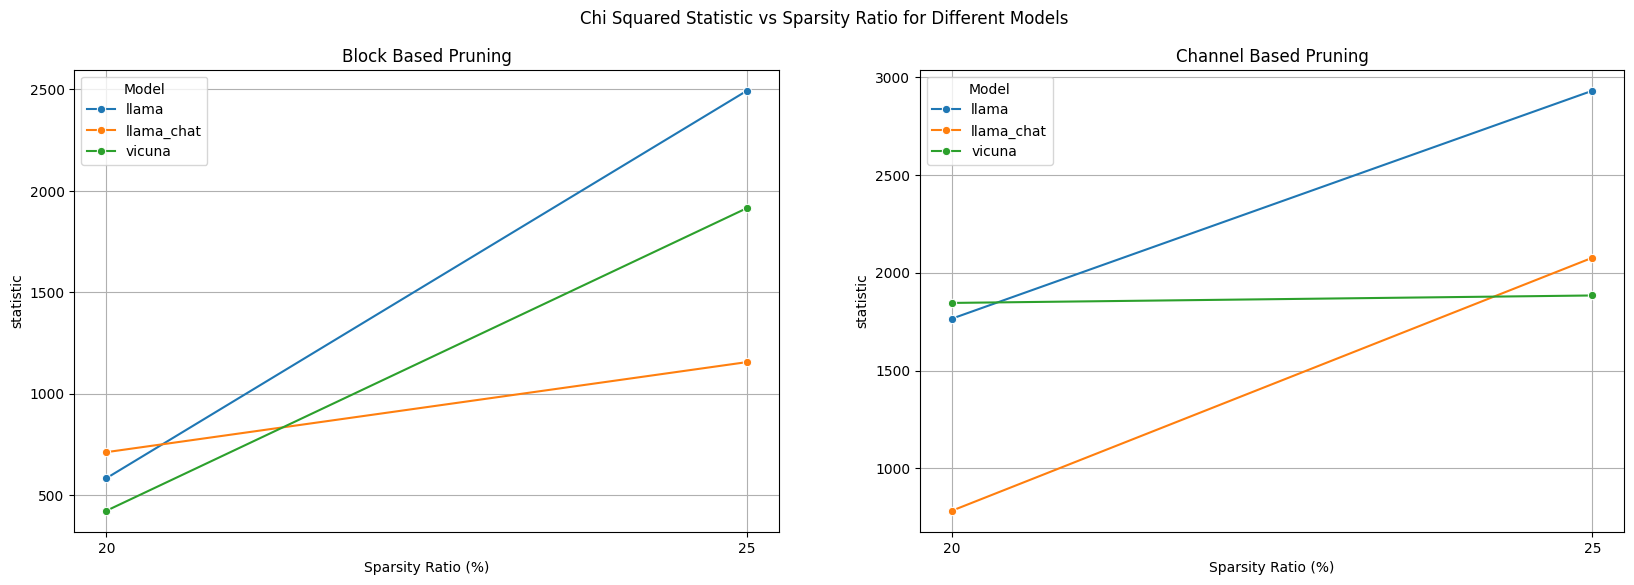

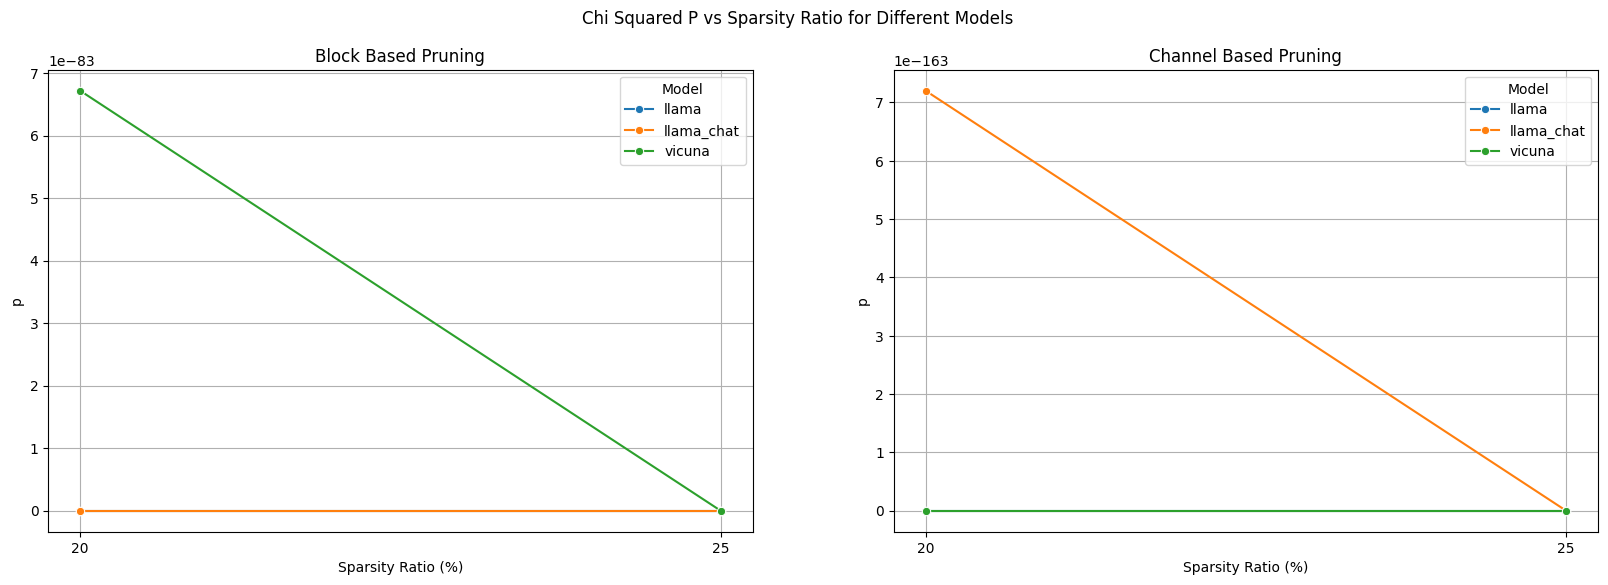

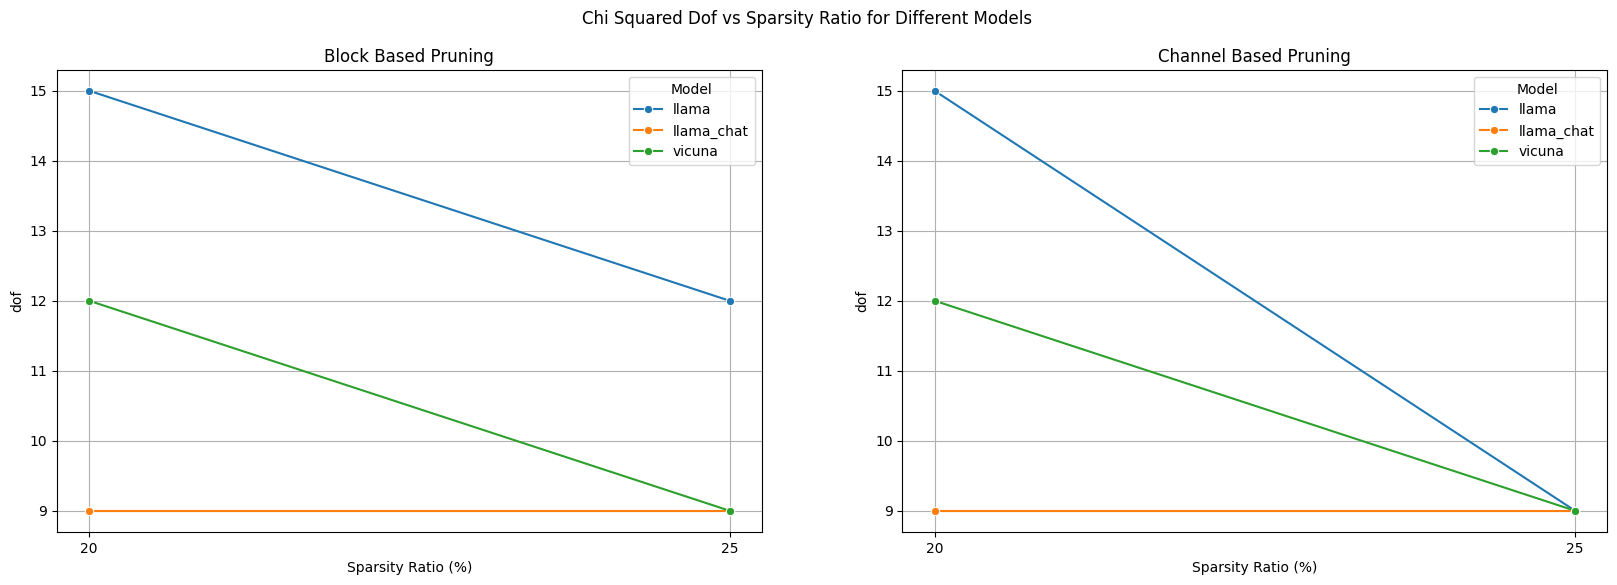

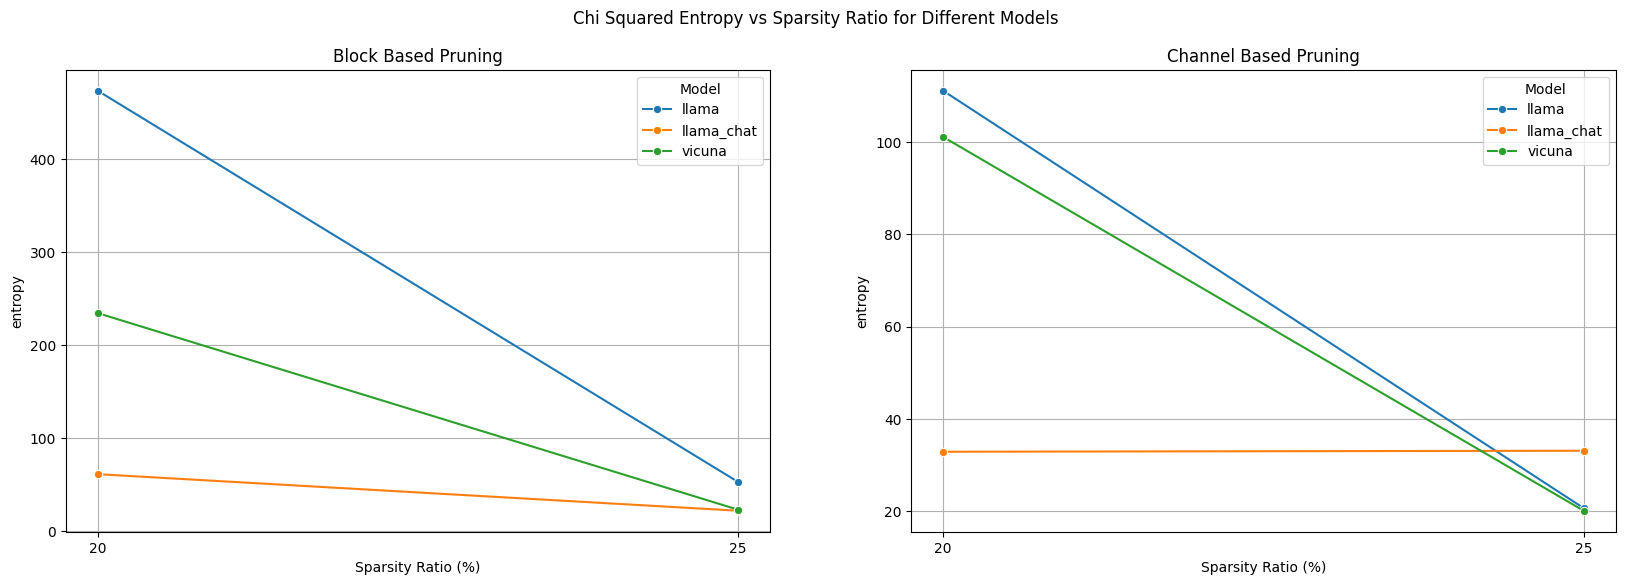

In [7]:
def line_plot(data, measure= "p"):
    df = pd.DataFrame(data)
    df_block = df[df.pruner_style == "block"]
    df_channel = df[df.pruner_style == "channel"]
    fig, [ax0, ax1] = plt.subplots(figsize=(20, 6), ncols=2)
    sns.lineplot(data=df_block, x="sparsity_ratio", y=measure, hue="model",ax=ax0 ,marker="o")
    ax0.set_title("Block Based Pruning")
    ax0.set_xlabel('Sparsity Ratio (%)')
    ax0.set_ylabel(f'{measure}')
    ax0.legend(title='Model')
    #ax0.set_ylim([0, 1])
    ax0.grid()
    sns.lineplot(data=df_channel, x="sparsity_ratio", y=measure, hue="model",ax=ax1 ,marker="o")
    ax1.set_title("Channel Based Pruning")
    ax1.set_xlabel('Sparsity Ratio (%)')
    ax1.set_ylabel(f'{measure}')
    ax1.legend(title='Model')
    #ax1.set_ylim([0, 1])
    ax1.grid()
    fig.suptitle(f'Chi Squared {measure.capitalize()} vs Sparsity Ratio for Different Models')
    plt.grid(True)
    plt.show()
line_plot(data, measure="statistic")
line_plot(data, measure="p")
line_plot(data, measure="dof")
line_plot(data, measure="entropy")

# Check all the distribution of data cluster

In [ ]:
import copy
import matplotlib
random_seed = False
plot_graph = True
all_label_skills = all_skill_label
ground_truth = get_ground_truth(all_label_skills,cognitive_skills_community)
ground_truth = np.array([comm for  _, comm in ground_truth.items()])
sparsity_ratio = "25"
pruner_style = "block"
model_idx, model = 0, "llama"
#for sparsity_ratio in ["3","15","20","25","30","35","40"]:
for sparsity_ratio in ["25"]:
    print(sparsity_ratio)
    G, property_1, (skills_modules, skill_label, module_label) = get_community_for_alpha(dataCategory1, dataset_list, distribution_dist[model_idx], original_dist[model_idx], pruner_style=pruner_style, sparsity_ratio=sparsity_ratio,alpha1=0.01,alpha2=0.01,random_seed=random_seed)
    community_detected_frequency = get_skills_shared_by_modules(G,property_1["community"],skills_modules,skill_label, module_label, all_label_skills)
    dataset_frequency = create_frequency_skills(dataCategory1, all_label_skills)
    community_detected_frequency_plot = copy.deepcopy(community_detected_frequency)
    community_detected_frequency_plot["Skills"] = all_label_skills
    community_detected_frequency_plot["Cognitive Function"] = []
    for skill in all_label_skills:
        for cog_function, skills_within_cog_function in cognitive_skills_community.items():
            if skill in skills_within_cog_function:
                community_detected_frequency_plot["Cognitive Function"].append(cog_function)
    df = pd.DataFrame.from_dict(community_detected_frequency_plot)
    kl_based_data = check_kl_divergence(community_detected_frequency,dataset_frequency)
    for comm in kl_based_data:
        print(comm, kl_based_data[comm])
    if plot_graph:
        #plot_community(G,property_1["partition"])
        fig, axis = plt.subplots(figsize=(15,5*(len(community_detected_frequency))), nrows= len(community_detected_frequency), sharex=True)
        color = matplotlib.colormaps['Accent'].colors
        for idx, comm in enumerate(community_detected_frequency):
            try:
                sns.histplot(df, x="Skills", weights=comm,color=color[int(comm)],hue="Cognitive Function", ax=axis[idx], discrete=True,common_norm=True,
                        edgecolor='black',
                        kde=True, kde_kws={"bw_adjust":.15,'cut': 0}, line_kws={'linewidth': 4})
            except:
                sns.histplot(df, x="Skills", weights=comm,color=color[int(comm)],hue="Cognitive Function", ax=axis[idx], discrete=True,common_norm=True,
                    edgecolor='black')
            axis[idx].set_title(f"Community {comm}", fontsize=24)
        plt.xticks(rotation=90)
        plt.title
        plt.show()
    print("++"*100)

## Plot Network Property

In [ ]:
data_skill_skill = {"model":[],"sparsity_value": [], "strategy":[], "average_degree":[],"average_cluster":[],"modularity":[],"density":[],"num_community":[],"global_efficiency":[],"diameter":[],"assortativity_coefficient":[],"average_path_length":[]}
print(data_skill_skill.keys())

In [ ]:
from utils.bag_of_words.bipartite_multipartite_projection import *
from utils.bag_of_words.network_property import *

AB_dataset_skill, skill_label = create_plot_bog_skills(dataCategory1, dataset_list, plot=False)
llama = ("llama",llama_distribution,llama_original)
vicuna = ("vicuna",vicuna_distribution,vicuna_original)
llama_chat = ("llama_chat",llama_chat_distribution,llama_chat_original)
global_property = ['average_degree', 'average_cluster', 'modularity', 'density', 'num_community', 'global_efficiency', 'diameter', 'assortativity_coefficient', 'average_path_length']
data_skill_skill =  {"model":[],"sparsity_value": [], "strategy":[]}
data_module_module = {"model":[],"sparsity_value": [], "strategy":[]}
for properties in global_property:
    data_skill_skill[properties] = []
    data_module_module[properties] = []

for strategy in ["block","channel"]:
    for model_name,pruned_distribution, original_distribution in [llama,vicuna,llama_chat]:
        for sparsity_value in ["3","15","20","25","30","35","40"]:
            BC_dataset_modules, module_label = create_plot_bog_modules(pruned_distribution,original_distribution, dataset_list,pruner_style=strategy, pruner_ratio=sparsity_value,norm="|W|_0",plot=False, alpha=0.01)
            A_skill_modules =  np.dot(AB_dataset_skill.T,BC_dataset_modules)
            A_skill_modules = spectral_sparsification(A_skill_modules, alpha=0.01)
            A_skill_skill,A_modules_modules  = get_projection(A_skill_modules, plot_projection= False)
            _, property_module = get_network_property(A_modules_modules,module_label,module_label)
            _, property_skill = get_network_property(A_skill_skill,skill_label,skill_label)

            ## collect data
            data_module_module["model"].append(model_name)
            data_module_module["sparsity_value"].append(sparsity_value)
            data_module_module["strategy"].append(strategy)

            data_skill_skill["model"].append(model_name)
            data_skill_skill["sparsity_value"].append(sparsity_value)
            data_skill_skill["strategy"].append(strategy)

            for properties in global_property:
                data_module_module[properties].append(property_module[properties])
                data_skill_skill[properties].append(property_skill[properties])


## Modules vs Modules

In [ ]:
def plot_line_plot(data, property):
    data = pd.DataFrame.from_dict(data)
    data_block = data[data["strategy"] == "block"]
    data_channel = data[data["strategy"] == "channel"]
    fig, (block_ax, channel_ax) = plt.subplots(figsize=(12,4) ,ncols=2)
    sns.lineplot(data=data_block, x="sparsity_value", y=property, hue="model", ax=block_ax)
    block_ax.set_title("Block Strategy")
    sns.lineplot(data=data_channel, x="sparsity_value", y=property, hue="model", ax=channel_ax)
    channel_ax.set_title("Channel Strategy")
    fig.suptitle(property)
    plt.plot()
for properties in global_property:
    plot_line_plot(data_module_module, properties)

## Skills vs Skills

In [ ]:
for properties in global_property:
    plot_line_plot(data_skill_skill, properties)

## Projection Network Plot

In [17]:
from utils.bag_of_words.projection_community import *
pruner_style="block"
sparsity_ratio="20"
def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
set_random_seed(0)
G, property, (dataset_modules,skills_modules, skill_label, module_label) = get_community_for_alpha(dataCategory1, dataset_list, llama_distribution, llama_original, pruner_style=pruner_style, sparsity_ratio=sparsity_ratio,alpha1=0.01,alpha2=0.01)

nx.write_edgelist(G, "graph/modules_modules.csv", data=["weight"])
data = {"node":[],"community":[],"layer":[]}

modules=["attn.q", "attn.k", "attn.v", "attn.o","gate","mlp.up", "mlp.down"]
all_label_modules=[ str(i)+"_"+m  for i in range(0,31) for m in modules]
community = property["partition"]
for node in all_label_modules:
    data["node"].append(node)
    if node in community:   
        data["community"].append(community[node])
    else:
        data["community"].append(-100) 
    data["layer"].append(node.split("_")[0])
    
node_list = pd.DataFrame.from_dict(data)
node_list.to_csv("graph/modules_modules_node.csv",index=False)

# Compare the performance between train certain Modules, all Modules and None Modules

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

def fill_nan(df):
    df.dropna()
    #df["finetune"] = df["finetune"].fillna("None")
    #df["rank"] = df["rank"].fillna("None")
    return df
#df = pd.read_csv('result/randomize_accuracy/temp.csv')
df_0 = pd.read_csv('result/randomize_accuracy/randomize_data_new_kl_0.csv')
df_2 = pd.read_csv('result/randomize_accuracy/randomize_data_new_kl_2.csv')
con_df= df_2#pd.concat([fill_nan(df_0), fill_nan(df_2)])
# Group by all columns except for 'accuracy' and 'l2', then calculate the mean for 'accuracy' and 'l2'
df = con_df.groupby(['iteration','model', 'pruning_style', 'community', 'pruning_ratio', 'dataset', 'rank', 'modules', 'modules_size', 'finetune',"min_loss"]).agg({'accuracy': 'mean'}).reset_index()
#,iteration,model,pruning_style,community,pruning_ratio,dataset,accuracy,rank,modules,modules_size,finetune,l2
#df["run_name"] = df["run_name"].fillna("None")
df = df.sort_values(['rank',"finetune"])
#df = df[(df["modules_size"].astype(int)>10) | (df["finetune"]== "All")]
df.to_csv("result/compare_impact_finetuning.csv",index=False)

'''for model in ["llama_chat"]:
    df_model = df[df["model"] == model ]
    for strategy in ["channel"]:
        df_strategy = df_model[df_model["pruning_style"] == strategy ]
        for community in [0,1,2,3,4]:
            df_comm = df_strategy[df_strategy["community"] == community ]
            # Plot the data using seaborn
            plt.figure(figsize=(12, 5))
            mod_size = np.unique(df_comm["modules_size"].tolist())[-1]
            print(mod_size)
            #sns.barplot(x='dataset_name', y='accuracy', hue='run_name', data=df_comm)
            sns.barplot(x='dataset', y='accuracy', hue='finetune',hue_order=["Community","Random","All"], data=df_comm)
            
            plt.xlabel('Dataset')
            plt.ylabel('Accuracy')
            plt.title(f'Comparison of Accuracy Values Strategy {strategy} using {model} model for {community} community ({mod_size} modules) ')
            plt.xticks(rotation=20)
            plt.legend()
            plt.grid(True)

            plt.tight_layout()

            # Display the plot
            plt.show()'''

'for model in ["llama_chat"]:\n    df_model = df[df["model"] == model ]\n    for strategy in ["channel"]:\n        df_strategy = df_model[df_model["pruning_style"] == strategy ]\n        for community in [0,1,2,3,4]:\n            df_comm = df_strategy[df_strategy["community"] == community ]\n            # Plot the data using seaborn\n            plt.figure(figsize=(12, 5))\n            mod_size = np.unique(df_comm["modules_size"].tolist())[-1]\n            print(mod_size)\n            #sns.barplot(x=\'dataset_name\', y=\'accuracy\', hue=\'run_name\', data=df_comm)\n            sns.barplot(x=\'dataset\', y=\'accuracy\', hue=\'finetune\',hue_order=["Community","Random","All"], data=df_comm)\n            \n            plt.xlabel(\'Dataset\')\n            plt.ylabel(\'Accuracy\')\n            plt.title(f\'Comparison of Accuracy Values Strategy {strategy} using {model} model for {community} community ({mod_size} modules) \')\n            plt.xticks(rotation=20)\n            plt.legend()\n  

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def perform_stat_test(data1,data2, data1_label, data2_label, alternate='two-sided'):
    
    # Perform Shapiro-Wilk test to check for normality of the differences
    '''
    print("\t\tShapiro-Wilk test")
    stat, p_value_normality = stats.shapiro(data1 - data2)
    print(f"\t\tNormality Test Statistic: {stat}, P-value: {p_value_normality}")
    if p_value_normality > 0.05:
        print("\t\tDifferences are normally distributed.")
        print("\t\tPaired t-test")
        # Perform the paired t-test
        t_stat, p_value = stats.ttest_rel(data1, data2)

        print(f"\t\tPaired t-test T-statistic: {t_stat}, Two-tailed P-value: {p_value}")

        # Interpret the results
        if p_value < 0.05:
            print(f"\t\tReject the null hypothesis: There is a significant difference between {data1_label} and {data2_label} accuracies.")
       
        else:
            print(f"\t\tFail to reject the null hypothesis: There is no significant difference between {data1_label} and {data2_label} accuracies.")
        print("="*100)
    else:
        print("\t\tDifferences are not normally distributed. Consider non-parametric tests if needed.")'''
        
    print("\t\tWilcox Test")
    # This code is ready to run, provided you input the actual accuracy data.
    #uivalent within the margin of delta.")
    difference = np.around(data1 - data2,decimals=3)
    #difference[np.where(difference == 0)] = 1e-3
    stat, p_value = stats.wilcoxon(difference,alternative=alternate, correction=True, method="approx")

    print(f"\t\tWilcoxon signed-rank test Statistic: {stat}, P-value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print(f"\t\tReject the null hypothesis: There is a significant difference between {data1_label} and {data2_label} accuracies.")
        if alternate == "greater" or alternate == "smaller":
            print(f"\t\t\t {data1_label} Accuracy is {alternate} than {data2_label} accuracy.")
        else:
            print(f"\t\t\t {data1_label} Accuracy is not similar than {data2_label} accuracy.")
    else:
        print(f"\t\tFail to reject the null hypothesis: There is no significant difference between {data1_label} and {data2_label} accuracies.")
    print("="*100)
    print()
    return stat,p_value 

# Bland-Altman Plot
def bland_altman_plot(data1, data2, data1_label, data2_label, alternate):
    data1, data2 = np.array(data1),np.array(data2)
    mean = (data1 + data2) / 2
    diff = data1 - data2
    md = diff.mean()
    sd = diff.std()
    wilcoxon_statistic, p_value = perform_stat_test(data1,data2, data1_label, data2_label, alternate=alternate) 
    plt.figure(figsize=(6, 4))
    plt.scatter(mean, diff, alpha=0.5)
    plt.axhline(md, color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red', linestyle='--')
    plt.axhline(md - 1.96*sd, color='red', linestyle='--')

    plt.text(0.05, 0.95, f'Wilcoxon Statistic: {wilcoxon_statistic}\nP-Value: {p_value:.5f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    plt.xlabel(f'Mean of Accuracy {data1_label} and Accuracy {data2_label}')
    plt.ylabel(f'Accuracy {data1_label} - Accuracy {data2_label}')
    plt.title(f'Bland-Altman Plot ({data1_label} vs {data2_label})')
    plt.show()
    return pd.DataFrame.from_dict({data1_label:data1, data2_label:data2})

for m in ["all","llama","llama_chat","vicuna"]:
    if m == "all":
        df_model = df
    else:
        df_model = df[df["model"] == m]
    for pruning_strategy in ["block","channel"]:
        df_pruning = df_model[df_model["pruning_style"] == pruning_strategy ]

        acc = df_pruning.groupby('finetune').aggregate(lambda tdf: tdf.tolist())["accuracy"]
        dataset = df_pruning.groupby('finetune').aggregate(lambda tdf: tdf.tolist())["dataset"][0]
        all, comm, rand = acc.iloc[0], acc.iloc[1], acc.iloc[2]
        print(f"{m} | {pruning_strategy}")
        
        data = bland_altman_plot(comm, all, "Community", "All",alternate='greater' )
        data.to_csv(f"result/bland_altman/{m}_{pruning_strategy}_comm_all.csv",index=False)
        data = bland_altman_plot(rand, all, "Random", "All",alternate='two-sided' )
        data.to_csv(f"result/bland_altman/{m}_{pruning_strategy}_rand_all.csv",index=False)
        data = bland_altman_plot(comm, rand, "Community", "Rand",alternate='greater' )
        data.to_csv(f"result/bland_altman/{m}_{pruning_strategy}_comm_rand.csv",index=False)


KeyError: 'loss'

In [4]:
import numpy as np
from scipy.stats import t
from scipy.stats import ttest_rel



for m in ["all","llama","vicuana"]:
    if m == "all":
        df_model = df
    else:
        df_model = df[df["model"] == m]
    for pruning_strategy in ["block","channel"]:
        df_pruning = df_model[df_model["pruning_style"] == pruning_strategy ]
        acc = df_pruning.groupby('finetune').aggregate(lambda tdf: tdf.tolist())["accuracy"]
        dataset = df_pruning.groupby('finetune').aggregate(lambda tdf: tdf.tolist())["dataset"][0]
        all, comm,  rand = acc.iloc[0], acc.iloc[1], acc.iloc[2]
        all, comm, rand = np.array(all),np.array(comm),np.array(rand)

        print("MODEL: ", m,pruning_strategy)
        print(f"\t {pruning_strategy}: Accuracy Community vs All ")
        perform_stat_test(comm,all,"Community", "All", alternate="greater")
        print(f"\t {pruning_strategy}:Accuracy Random vs All ")
        perform_stat_test(rand,all,"Random", "All",alternate='two-sided')
        print(f"\t {pruning_strategy}:Accuracy Community vs Random ")
        perform_stat_test(comm,rand,"Community", "Random",alternate="greater")


    #print("\tAccuracy Community vs None ")
    #perform_stat_test(comm,none,"Community", "None", alternate="greater")
    #print("\tAccuracy Random vs None ")
    #perform_stat_test(rand,none,"Random", "None",alternate='two-sided')      


MODEL:  all block
	 block: Accuracy Community vs All 
		Wilcox Test
		Wilcoxon signed-rank test Statistic: 1014.5, P-value: 0.109473423051069
		Fail to reject the null hypothesis: There is no significant difference between Community and All accuracies.

	 block:Accuracy Random vs All 
		Wilcox Test
		Wilcoxon signed-rank test Statistic: 792.5, P-value: 0.48644803036128914
		Fail to reject the null hypothesis: There is no significant difference between Random and All accuracies.

	 block:Accuracy Community vs Random 
		Wilcox Test
		Wilcoxon signed-rank test Statistic: 162.0, P-value: 0.052221642093179296
		Fail to reject the null hypothesis: There is no significant difference between Community and Random accuracies.

MODEL:  all channel
	 channel: Accuracy Community vs All 
		Wilcox Test
		Wilcoxon signed-rank test Statistic: 1207.0, P-value: 0.00012491689841145188
		Reject the null hypothesis: There is a significant difference between Community and All accuracies.
			 Community Accura

/tmp/ipykernel_3176696/2857331715.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset = df_pruning.groupby('finetune').aggregate(lambda tdf: tdf.tolist())["dataset"][0]
/tmp/ipykernel_3176696/2857331715.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset = df_pruning.groupby('finetune').aggregate(lambda tdf: tdf.tolist())["dataset"][0]
/tmp/ipykernel_3176696/2857331715.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

IndexError: index 0 is out of bounds for axis 0 with size 0